In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from gapminder import gapminder

# Ej 1

## a) 

Ejecutar el siguiente codigo y observar si hay filas con datos faltantes (NaN)

In [2]:
penguins = sns.load_dataset("penguins")

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Si hay, ya podemos ver un NaN en 3.

In [4]:
penguins.isnull().values.any()

True

In [5]:
penguins = penguins.dropna()
display(penguins)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [6]:
penguins.shape

(333, 7)

In [7]:
# Consigo el 20%
test = penguins.shape[0] * 20 / 100 

# lo redondeo
test = int(test)
print(test)

# recordar sumar 1 al train, asi no desaprovecho una fila.

66


## b)

### A -> Utilizando un array de Numpy para filtrar

In [8]:
# creo array del mismo tamaño que el database, todos con valor False
train_ind = np.full(penguins.shape[0], False) 

# Cambio los 1ros 80% a True
train_ind[0:penguins.shape[0] - test] = True

np.random.shuffle(train_ind) # Lo guarda el mismo vector

# Selecciono de penguins los que su indice coinciden con que train_ind == True, garantizandome una eleccion al azar de train
penguins_train2 = penguins[train_ind == True]

# Lo mismo pero con False para los de test%
penguins_test2 = penguins[train_ind == False]

In [9]:
display(train_ind)

array([ True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
       False,  True,  True, False,  True, False,  True, False,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True, False, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,

In [10]:
display(penguins_train2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
...,...,...,...,...,...,...,...
333,Gentoo,Biscoe,51.5,16.3,230.0,5500.0,Male
334,Gentoo,Biscoe,46.2,14.1,217.0,4375.0,Female
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,Male
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,Male


In [11]:
display(penguins_test2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
19,Adelie,Torgersen,46.0,21.5,194.0,4200.0,Male
22,Adelie,Biscoe,35.9,19.2,189.0,3800.0,Female
23,Adelie,Biscoe,38.2,18.1,185.0,3950.0,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,43.3,14.0,208.0,4575.0,Female
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male


### B -> train_test_split de sklearn

In [12]:
from sklearn.model_selection import train_test_split
penguins_train, penguins_test = train_test_split(penguins, test_size = 0.2, random_state = 42)

In [13]:
display(penguins_test)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
30,Adelie,Dream,39.5,16.7,178.0,3250.0,Female
317,Gentoo,Biscoe,46.9,14.6,222.0,4875.0,Female
79,Adelie,Torgersen,42.1,19.1,195.0,4000.0,Male
201,Chinstrap,Dream,49.8,17.3,198.0,3675.0,Female
63,Adelie,Biscoe,41.1,18.2,192.0,4050.0,Male
...,...,...,...,...,...,...,...
288,Gentoo,Biscoe,43.5,14.2,220.0,4700.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
83,Adelie,Torgersen,35.1,19.4,193.0,4200.0,Male
319,Gentoo,Biscoe,51.1,16.5,225.0,5250.0,Male


In [14]:
display(penguins_train)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
230,Gentoo,Biscoe,40.9,13.7,214.0,4650.0,Female
84,Adelie,Dream,37.3,17.8,191.0,3350.0,Female
303,Gentoo,Biscoe,50.0,15.9,224.0,5350.0,Male
22,Adelie,Biscoe,35.9,19.2,189.0,3800.0,Female
29,Adelie,Biscoe,40.5,18.9,180.0,3950.0,Male
...,...,...,...,...,...,...,...
194,Chinstrap,Dream,50.9,19.1,196.0,3550.0,Male
77,Adelie,Torgersen,37.2,19.4,184.0,3900.0,Male
112,Adelie,Biscoe,39.7,17.7,193.0,3200.0,Female
277,Gentoo,Biscoe,45.5,15.0,220.0,5000.0,Male


In [21]:
from sklearn.model_selection import train_test_split

# Quito la columna "species" para obtener las caracteristicas 
x = penguins.drop("species", axis = 1)

# Utilizo la columna "species" como nuestra variable objetivo
y = penguins["species"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [41]:
display(x_train)

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
230,Biscoe,40.9,13.7,214.0,4650.0,Female
84,Dream,37.3,17.8,191.0,3350.0,Female
303,Biscoe,50.0,15.9,224.0,5350.0,Male
22,Biscoe,35.9,19.2,189.0,3800.0,Female
29,Biscoe,40.5,18.9,180.0,3950.0,Male
...,...,...,...,...,...,...
194,Dream,50.9,19.1,196.0,3550.0,Male
77,Torgersen,37.2,19.4,184.0,3900.0,Male
112,Biscoe,39.7,17.7,193.0,3200.0,Female
277,Biscoe,45.5,15.0,220.0,5000.0,Male


## c )

Crear y ajustar 3 modelos utilizando polinomios de grados 1, 2 y 3

In [45]:
from sklearn.model_selection import train_test_split
from formulaic import Formula
from sklearn import linear_model 
from sklearn.preprocessing import PolynomialFeatures    # Herramientas de polinomios
from formulaic import model_matrix

In [46]:
from sklearn.model_selection import train_test_split
penguins_train, penguin_test = train_test_split(penguins, test_size = 0.2, random_state = 42)

In [47]:
penguins_train.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
230,Gentoo,Biscoe,40.9,13.7,214.0,4650.0,Female
84,Adelie,Dream,37.3,17.8,191.0,3350.0,Female
303,Gentoo,Biscoe,50.0,15.9,224.0,5350.0,Male
22,Adelie,Biscoe,35.9,19.2,189.0,3800.0,Female
29,Adelie,Biscoe,40.5,18.9,180.0,3950.0,Male


In [57]:
# Hacemos un modelo lineal

y, X = model_matrix("bill_length_mm ~ species + body_mass_g - 1", penguins)

pd.concat([y, X], axis = 1)

,bill_length_mm,species[T.Adelie],species[T.Chinstrap],species[T.Gentoo],body_mass_g
0,39.1,1,0,0,3750.0
1,39.5,1,0,0,3800.0
2,40.3,1,0,0,3250.0
4,36.7,1,0,0,3450.0
5,39.3,1,0,0,3650.0
...,...,...,...,...,...
338,47.2,0,0,1,4925.0
340,46.8,0,0,1,4850.0
341,50.4,0,0,1,5750.0
342,45.2,0,0,1,5200.0


In [58]:
from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.metrics import mean_squared_error, r2_score  

In [62]:
modelo = linear_model.LinearRegression()    # Inicializamos un modelo de Regresion Lineal
modelo.fit(X, y)   # Realizamos el ajuste
beta_1 = modelo.coef_   # Con .coef_ recuperamos el valor de beta_1 (dentro de un array)
beta_0 = modelo.intercept_   # Con .intercept_ recuperamos el valor de beta_0 (dentro de  un array)
print(beta_1)
print(beta_0)

[[-4.48264710e+00  5.42611521e+00 -9.43468111e-01  3.75461195e-03]]
[29.39141062]


# Ej 2

## a) 

Realizar un grafico de dispersion para cada par de variables

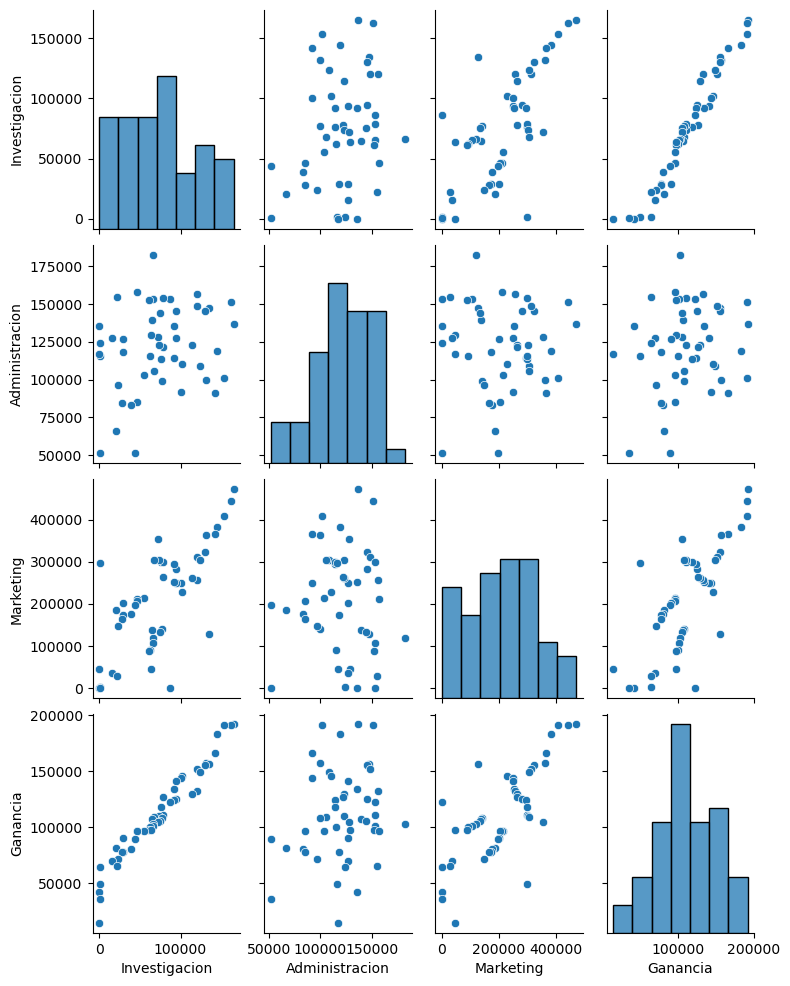

In [26]:
startups = pd.read_csv("50_Startups.csv")
sns.pairplot(
    data = startups, aspect = .8
)

Si quisieramos predecir la ganancia mediante un modelo lineal utilizando una sola variable predictora, ¿Cuál variable utilizaría?

Diseñe un experimento para verificar su respuesta

- Tan solo viendo el grafico de "Investigacion" x "Ganancia" (abajo izquierda) podriamos generar una regresion lineal para predecir futuros resultados, ya que logramos ver una similitud a una recta. 

In [ ]:
startups.head()

In [ ]:
# Generamos la regresion lineal para "Investigacion" y "Ganancia"

(
    so.Plot(data=startups, x='Investigacion', y='Ganancia')
    .add(so.Dot())
    .add(so.Line(color='red', linewidth=2), so.PolyFit(1), label='Regresion lineal')
)

## b)

¿Considera que un modelo lineal multivariado ayudaria a predecir mejor la ganancia que el modelo lineal univariado del item anterior?

Realizar un experimento para verificar su respuesta.

En un modelo lineal multivariado estariamos obteniendo datos de multiples grafos a la vez, dandonos una precision mayor que el modelo lineal univariado utilizado en a). 

Entonces, creo que crear este modelo nos ayudará a mejorar la precisión de la ganancia en general.

In [ ]:
!pip install formulaic

In [ ]:
from formulaic import model_matrix

In [ ]:
startups.head()

In [ ]:
df = startups

# Definimos y = Ganancia como variable objetivo
# Definimos x = "Administracion", "Marketing", "Estado", e "Investigacion" las variables predictoras.
y, x = model_matrix("Ganancia ~ Administracion + Marketing + Estado + Investigacion", df)
pd.concat([y, x], axis = 1)

# ~ = "Separates the target features from the input features." 
# + = "Adds a new term to the set of features." (segun bibliografia)

## Terminar b)